In [67]:
#Import modules
import pandas as pd

In [68]:
# Load the CSV file
base = '../rcie-system-metrics-data/'
domain = '2023-04-18_13-59-12_rcie-api-default/'
file = 'metrics-with-output-and-standardized-unit.csv'
file_path = base + domain + file

In [69]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [70]:
col_names = ["Time","Timestamp","iowait","irq","nice","softirq","steal","system","user","Used","Buffer","Cached","Free","br-10cd1f6f3899 receive","docker0 receive","eth0 receive","eth1 receive","lo receive","veth6750e95 receive","br-10cd1f6f3899 transmit","docker0 transmit","eth0 transmit","eth1 transmit","lo transmit","veth6750e95 transmit","total-req-rate","ok-req-rate","error-req-rate","avg-res-time","ServerStatus"]

# Load dataset
pima = pd.read_csv(file_path, skiprows=1, header=None, names=col_names)
pima.head()

,Time,Timestamp,iowait,irq,nice,softirq,steal,system,user,Used,...,docker0 transmit,eth0 transmit,eth1 transmit,lo transmit,veth6750e95 transmit,total-req-rate,ok-req-rate,error-req-rate,avg-res-time,ServerStatus
0,2023-04-18 13:59:10,1681801150000,0.0,0,0,0.0,0.002,0.002,0.002,311,...,0,0.0492,2.25,0.0,0.0834,0.2,0.2,0.0,1.41,0
1,2023-04-18 13:59:15,1681801155000,0.0,0,0,0.0,0.000,0.002,0.000,311,...,0,0.0408,2.28,0.0,0.0966,0.2,0.2,0.0,1.37,0
2,2023-04-18 13:59:20,1681801160000,0.0,0,0,0.0,0.000,0.002,0.004,311,...,0,0.0324,2.28,0.0,0.0918,0.2,0.2,0.0,1.36,0
3,2023-04-18 13:59:25,1681801165000,0.0,0,0,0.0,0.002,0.000,0.004,311,...,0,0.0000,2.27,0.0,0.0834,0.2,0.2,0.0,1.36,0
4,2023-04-18 13:59:30,1681801170000,0.0,0,0,0.0,0.000,0.002,0.002,311,...,0,0.0000,2.27,0.0,0.0966,0.2,0.2,0.0,1.38,0


In [71]:
# Split dataset in features and target variable
feature_cols = ["iowait","irq","nice","softirq","steal","system","user","Used","Buffer","Cached","Free","br-10cd1f6f3899 receive","docker0 receive","eth0 receive","eth1 receive","lo receive","veth6750e95 receive","br-10cd1f6f3899 transmit","docker0 transmit","eth0 transmit","eth1 transmit","lo transmit","veth6750e95 transmit","total-req-rate","ok-req-rate","error-req-rate","avg-res-time"]
X = pima[feature_cols] # Features
y = pima.ServerStatus # Target variable

In [72]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [73]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Decision Tree Classification

In [74]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8808777429467085


#### Optimizing Decision Tree Performance

In [76]:
# Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9059561128526645


In [77]:
# # Visualizing Decision Trees
# from six import StringIO 
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

### K-Nearest Neighbors Classification

In [78]:
# Create K-Nearest Neighbors classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Train K-Nearest Neighbors classifier
knn.fit(X_train_scale, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test_scale)

In [79]:
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9122257053291536


#### Using Cross Validation to Get the Best Value of k

In [80]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

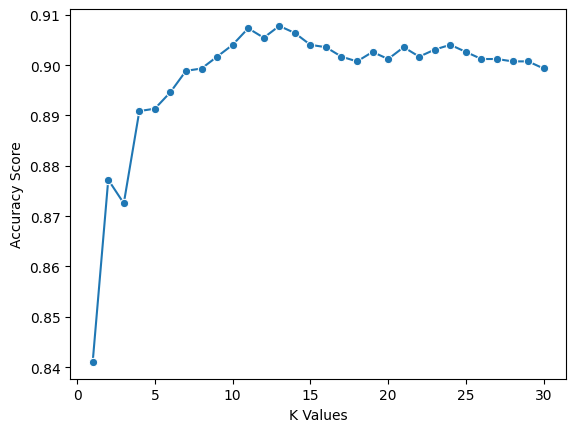

In [81]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [82]:
# More Evaluation Metrics
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [83]:
# then evaluate with accuracy, precision, and recall (note your results may differ due to randomization)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9090909090909091
Precision: 0.7631578947368421
Recall: 0.5918367346938775
